Import Library:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# import datetime as dt
# import time as t

import warnings
warnings.filterwarnings("ignore")

Load Dataset:

In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/Colaboratory/Walmart Sales Forecasting/train.csv", names=['Store','Dept','Date','Weekly_Sales','IsHoliday'],sep=',', header=0)
df_features = pd.read_csv("/content/drive/MyDrive/Colaboratory/Walmart Sales Forecasting/features.csv",sep=',', header=0,
                       names=['Store','Date','Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4',
                              'MarkDown5','CPI','Unemployment','IsHoliday']).drop(columns=['IsHoliday'])
df_stores = pd.read_csv("/content/drive/MyDrive/Colaboratory/Walmart Sales Forecasting/stores.csv", names=['Store','Type','Size'],sep=',', header=0)



In [ ]:
print('\nTrain Dataset:\n', df_train.head())
print('\nFeatures Dataset:\n', df_features.head())
print('\nStores Dataset:\n', df_stores.head())


Train Dataset:
    Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False

Features Dataset:
    Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  
0        NaN        NaN        NaN  211.096358         8.106  
1        NaN        NaN        NaN  211.242170         8.106  
2        NaN        NaN        NaN 

In [ ]:
print('Shape of Train DataFrame:', df_train.shape)
print('Shape of Features DataFrame:', df_features.shape)
print('Shape of Stores DataFrame:', df_stores.shape)

Shape of Train DataFrame: (421570, 5)
Shape of Features DataFrame: (8190, 11)
Shape of Stores DataFrame: (45, 3)


In [ ]:
df = df_train.merge(df_stores, how='left').merge(df_features, how='left')

In [ ]:
df.shape

(421570, 16)

In [ ]:
# df.head(100000)

In [ ]:
# df.tail(300000)

In [ ]:
# df_train.head(100)

In [ ]:
# df_features.head(100)

In [ ]:
# df_stores.head()

In [ ]:
# df = df_train.merge(df_features, on = ['Date', 'Store', 'IsHoliday'], how = 'inner').merge(df_stores, on = ['Store'], how = 'inner')

In [ ]:
# df.drop(columns = 'IsHoliday_y')
# df = df.rename({'IsHoliday_x' : 'IsHoliday'}, axis = 1)

In [ ]:
df.describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,136727.915739,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289
std,12.785297,30.492054,22711.183519,60980.583328,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296
min,1.000000,1.000000,-4988.940000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,11.000000,18.000000,2079.650000,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000
50%,22.000000,37.000000,7612.030000,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000
75%,33.000000,74.000000,20205.852500,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000


In [ ]:
df.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Type             object
Size              int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
dtype: object

In [ ]:
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

In [ ]:
mk_down = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
df[mk_down].mean()

MarkDown1    7246.420196
MarkDown2    3334.628621
MarkDown3    1439.421384
MarkDown4    3383.168256
MarkDown5    4628.975079
dtype: float64

In [ ]:
# df.drop(columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], axis = 1)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,192.013558,8.684
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,192.170412,8.667
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,192.327265,8.667
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,192.330854,8.667


In [ ]:
for col in mk_down:
  df[col] = df[col].fillna(df[col].mean())
  # df[col] = df[col].fillna(0)


In [ ]:
df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64

Data Visualization

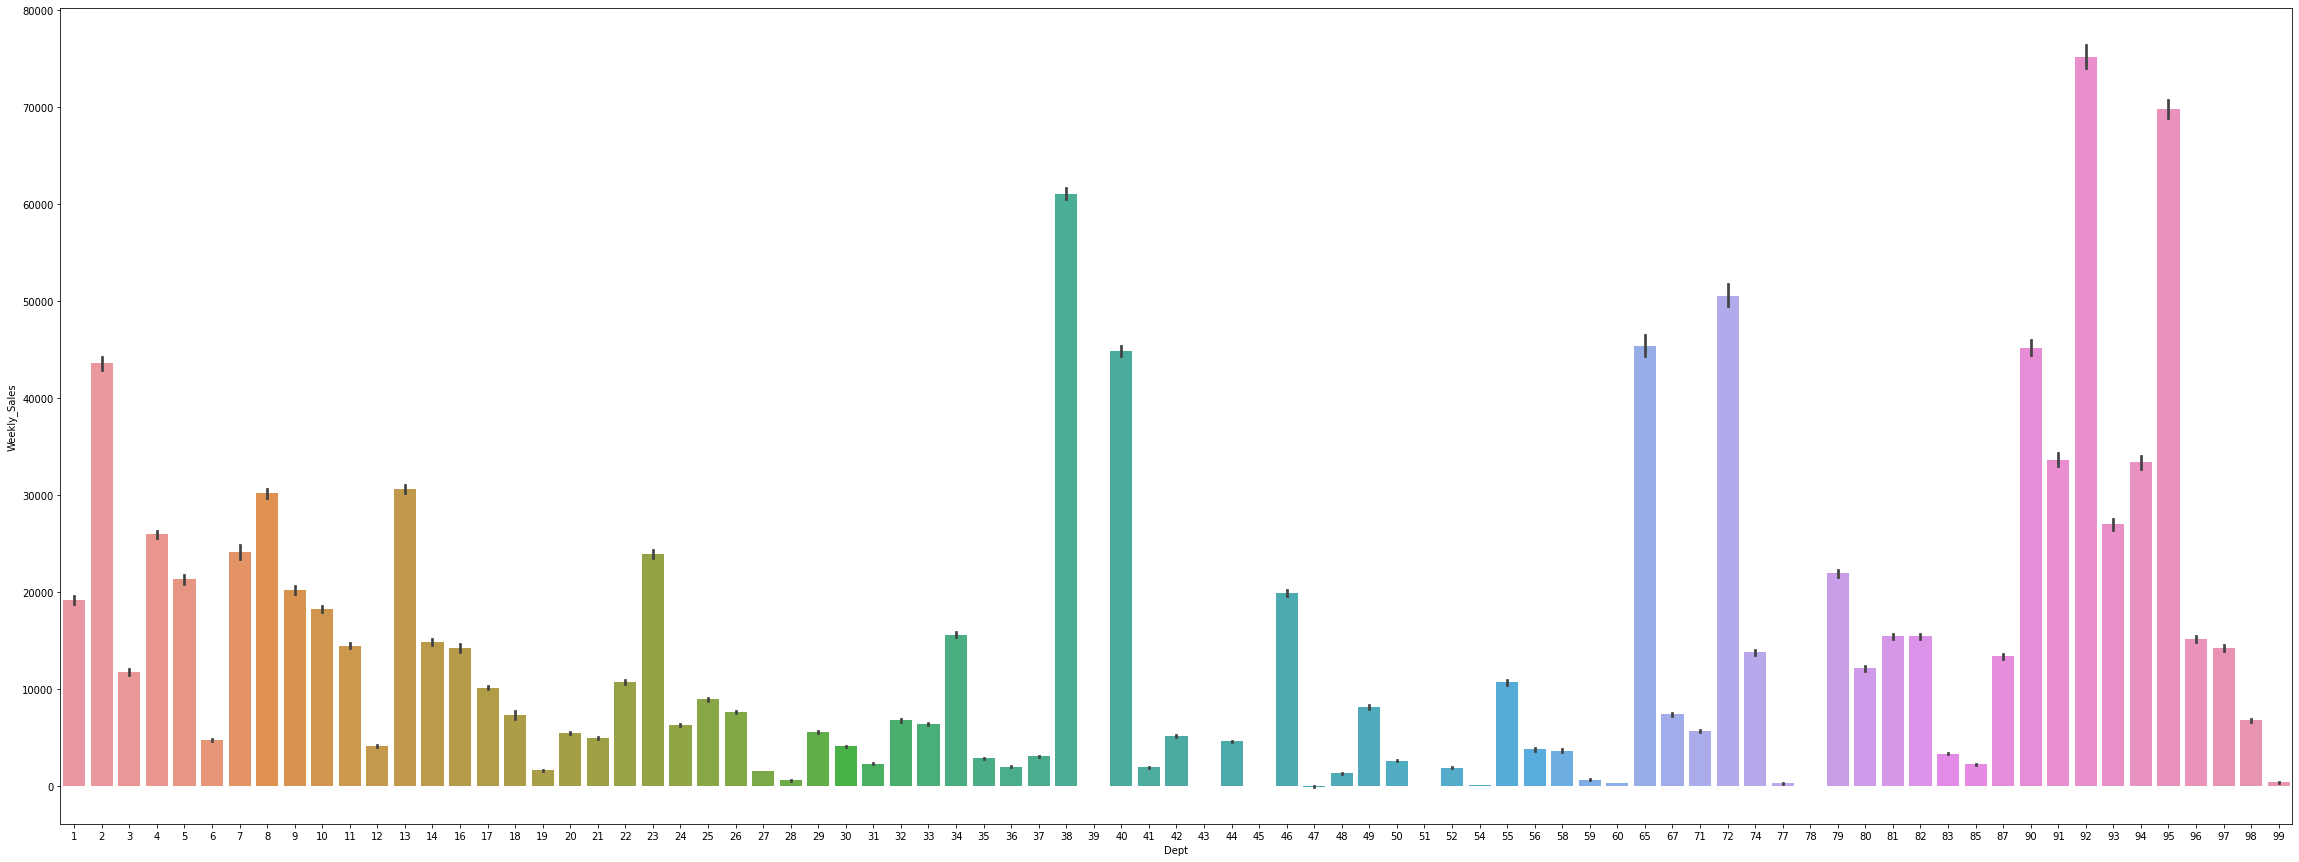

In [ ]:
plt.figure(figsize = (40, 15))
sns.barplot(data = df, x = 'Dept', y = 'Weekly_Sales')

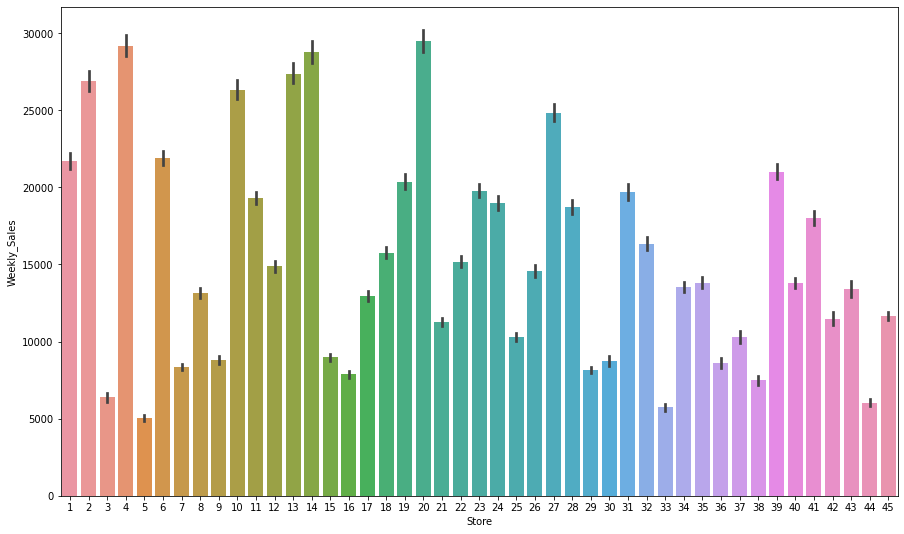

In [ ]:
plt.figure(figsize = (15, 9))
sns.barplot(data = df, x ='Store', y = 'Weekly_Sales')

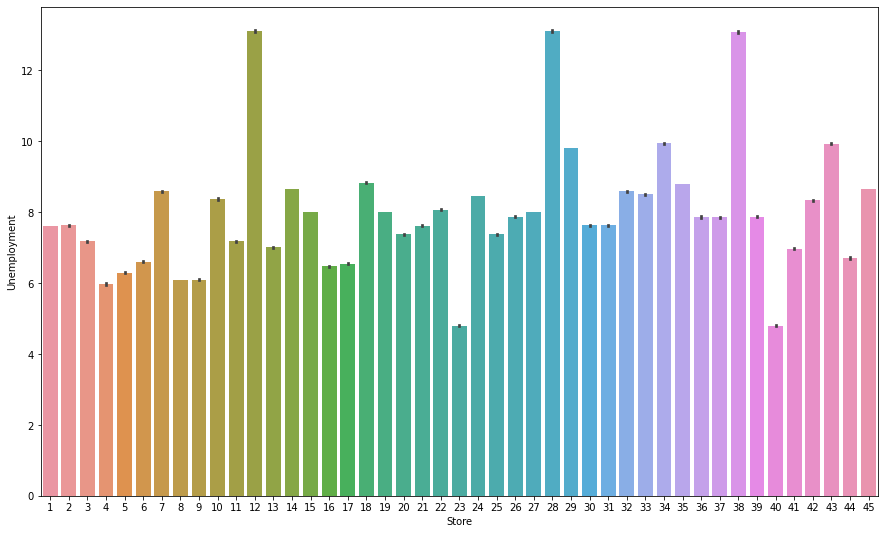

In [ ]:
plt.figure(figsize = (15, 9))
sns.barplot(data = df, x ='Store', y = 'Unemployment')

In [ ]:
# plt.figure(figsize = (15, 9))
# sns.barplot(data = df, x ='Weekly_Sales', y = 'Size')
# plt.show()

In [ ]:
plt.figure(figsize = (15, 9))
sns.displot(data = df, x = 'Temperature', y = 'CPI', kind = 'kde')

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['week'] = df['Date'].dt.week
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

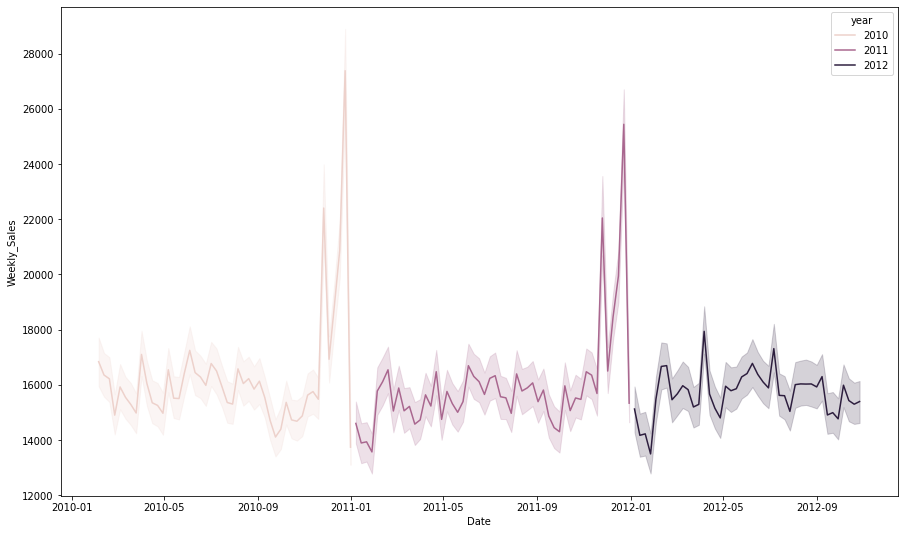

In [ ]:
plt.figure(figsize = (15, 9))
sns.lineplot(data = df, x = 'Date', y = 'Weekly_Sales', hue = 'year')

In [ ]:
plt.figure(figsize = (15, 9))
sns.lineplot(data = df, x = 'week', y = 'Weekly_Sales', hue = 'year', palette = 'Set1')

In [ ]:
plt.figure(figsize = (15, 9))
sns.lineplot(data = df, x = 'Weekly_Sales', y = 'Fuel_Price')

In [ ]:
plt.figure(figsize = (15, 10))
sns.barplot(data = df, x= 'year', y = 'Fuel_Price', hue = 'month', palette = 'Set2')

In [ ]:
le = LabelEncoder()

df['IsHoliday'] = le.fit_transform(df['IsHoliday'])
df['Type'] = le.fit_transform(df['Type'])

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
target = 'Weekly_Sales'
features = [i for i in df.columns if i not in [target]]

In [ ]:
# remove outliers
new_df = df.copy()
for i in features:
  Q1 = new_df[i].quantile(0.25)
  Q3 = new_df[i].quantile(0.75)
  IQR = Q3 - Q1
  new_df = new_df[new_df[i] <= (Q3 + (1.5 * IQR))]
  new_df = new_df[new_df[i] >= (Q1 - (1.5 * IQR))]
  new_df = new_df.reset_index(drop = True)
display(new_df.head())
print('\n\033[1mInference:\033[0m\nBefore remove outliers, the dataset {}'.format(df.shape[0]))
print('After remove outliers, the dataset {}'.format(new_df.shape[0]))

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,0,0,151315,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106
1,1,1,2010-02-19,41595.55,0,0,151315,39.93,2.514,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.289143,8.106
2,1,1,2010-02-26,19403.54,0,0,151315,46.63,2.561,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.319643,8.106
3,1,1,2010-03-05,21827.90,0,0,151315,46.50,2.625,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.350143,8.106
4,1,1,2010-03-12,21043.39,0,0,151315,57.79,2.667,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.380643,8.106



Inference:
Before remove outliers, the dataset 421570
After remove outliers, the dataset 229765


In [ ]:
new_df.shape

(229765, 16)

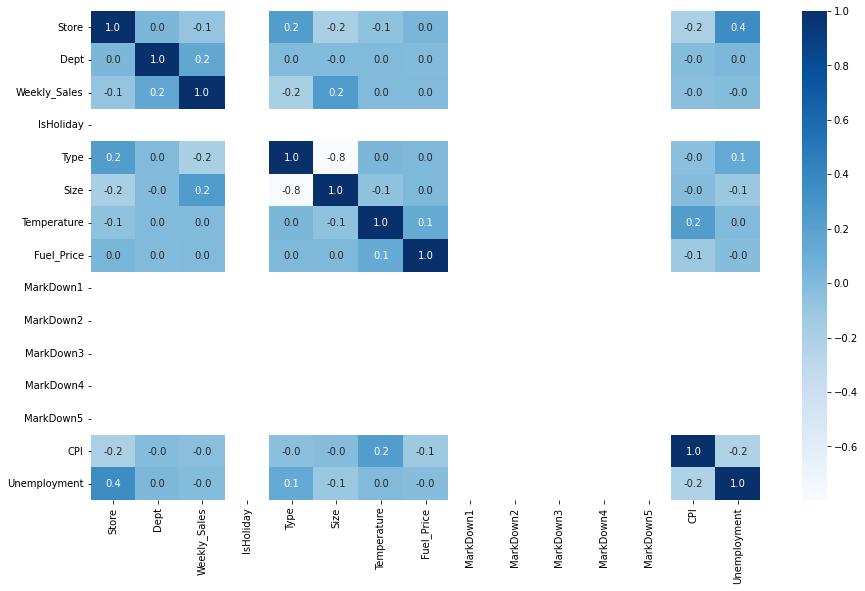

In [ ]:
plt.figure(figsize = (15, 9))
sns.heatmap(new_df.corr(), annot = True, cmap = 'Blues', fmt='.1f')

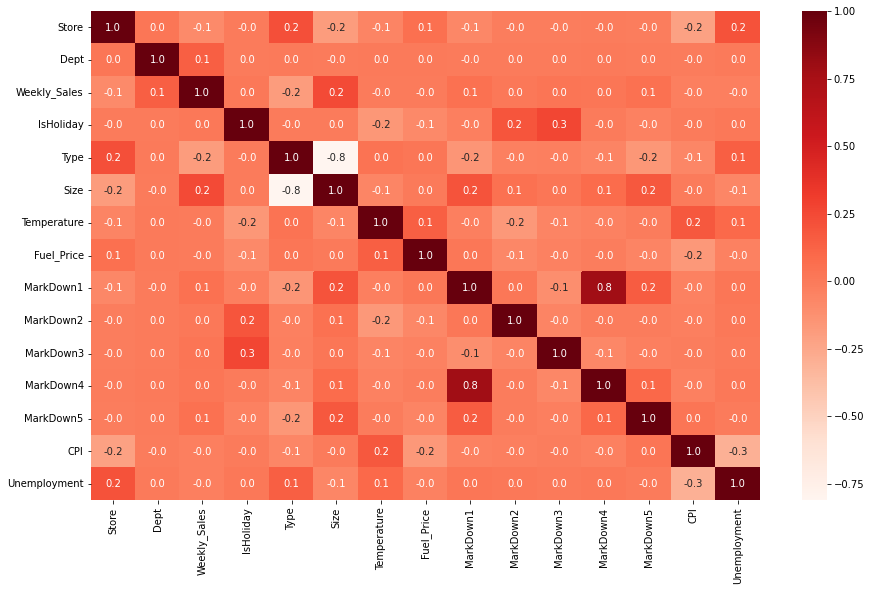

In [ ]:
plt.figure(figsize = (15, 9))
sns.heatmap(df.corr(), annot = True, cmap = 'Reds', fmt='.1f')

In [ ]:
# X = df.drop(columns = ['Date', 'MarkDown1'], axis = 1)
# y = df['MarkDown1']
X = new_df.drop(columns = ['Date', 'Weekly_Sales'], axis = 1)
y = new_df[target]

In [ ]:
print(X.shape)
print(y.shape)

(229765, 14)
(229765,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (183812, 14)
Shape of X_test: (45953, 14)
Shape of y_train: (183812,)
Shape of y_test: (45953,)


In [ ]:
scale = StandardScaler()

X_train_scale = scale.fit_transform(X_train)
X_test_scale = scale.fit_transform(X_test)

In [ ]:
model = {}
y_pred = {}

model['LinReg'] = LinearRegression()
model['GBoostRegressor'] = GradientBoostingRegressor()
model['SVR'] = SVR()
model['NeighborsRegressor'] = KNeighborsRegressor()

for m in model:
  model[m].fit(X_train_scale, y_train)
  y_pred[m] = model[m].predict(X_test_scale)

In [ ]:
for model in y_pred:
  r2[model] = r2_score(y_test, y_pred[model])
  mae[model] = mean_absolute_error(y_test, y_pred[model])
  mse[model] = mean_squared_error(y_test, y_pred[model])

  print('\n{}'.format(model), r2[model])
  print('\n{}'.format(model), mae[model])
  print('\n{}'.format(model), mse[model])